# Analysis first of the variants and of which mutations are shared and unique between the three variants

We're interesting in identifying which mutations confer the unique activity.

We can make inferences based on the general lineage data and then go and verify these with the data from the LevSeq examples.

In [45]:
import pandas as pd

df = pd.read_csv('lineage_summary.csv')
df

,linage,enantiomer,name,mutation,codon,AA,DNA
0,NOPiv,1,G0,#PARENT#,#PARENT#,MTPSDIPGYDYGRVEKSPITDLEFDLLKKTVMLGEEDVMYLKKAAD...,ATGACTCCCTCGGACATCCCGGGGTATGATTATGGGCGTGTCGAGA...
1,NOPiv,1,G1,V89I,ATA,MTPSDIPGYDYGRVEKSPITDLEFDLLKKTVMLGEEDVMYLKKAAD...,ATGACTCCCTCGGACATCCCGGGGTATGATTATGGGCGTGTCGAGA...
2,NOPiv,1,G2,V38I,ATA,MTPSDIPGYDYGRVEKSPITDLEFDLLKKTVMLGEEDIMYLKKAAD...,ATGACTCCCTCGGACATCCCGGGGTATGATTATGGGCGTGTCGAGA...
3,NOPiv,1,G3,A93L,CTT,MTPSDIPGYDYGRVEKSPITDLEFDLLKKTVMLGEEDIMYLKKAAD...,ATGACTCCCTCGGACATCCCGGGGTATGATTATGGGCGTGTCGAGA...
4,NOPiv,1,G4,I149L,CTT,MTPSDIPGYDYGRVEKSPITDLEFDLLKKTVMLGEEDIMYLKKAAD...,ATGACTCCCTCGGACATCCCGGGGTATGATTATGGGCGTGTCGAGA...
5,NOPiv,1,G5-1,L93I,ATT,MTPSDIPGYDYGRVEKSPITDLEFDLLKKTVMLGEEDIMYLKKAAD...,ATGACTCCCTCGGACATCCCGGGGTATGATTATGGGCGTGTCGAGA...
6,NOPiv,1,G6-1,L86C,TGT,MTPSDIPGYDYGRVEKSPITDLEFDLLKKTVMLGEEDIMYLKKAAD...,ATGACTCCCTCGGACATCCCGGGGTATGATTATGGGCGTGTCGAGA...
7,NOPiv,1,G7-1,A59V,GTT,MTPSDIPGYDYGRVEKSPITDLEFDLLKKTVMLGEEDIMYLKKAAD...,ATGACTCCCTCGGACATCCCGGGGTATGATTATGGGCGTGTCGAGA...
8,NOPiv,1,G11-1,I38M_K43M_E115E_V127L_S186S,ATG_ATG_GAG_CTC_TCG,MTPSDIPGYDYGRVEKSPITDLEFDLLKKTVMLGEEDMMYLKMAAD...,ATGACTCCCTCGGACATCCCGGGGTATGATTATGGGCGTGTCGAGA...
9,NOPiv,2,G5-2,L93F,TTT,MTPSDIPGYDYGRVEKSPITDLEFDLLKKTVMLGEEDIMYLKKAAD...,ATGACTCCCTCGGACATCCCGGGGTATGATTATGGGCGTGTCGAGA...


# Question 1: Which mutations are unique o H2NOH 

In [46]:
from sciutil import SciUtil

u = SciUtil()

h2noh = df[df['linage'] == 'H2NOH']
h2noh_mutations = set(h2noh['mutation'])

# Also look at the NOPiv mutations
nopiv = df[df['linage'] == 'NOPiv']
nopiv_mutations = set(nopiv['mutation'])

u.dp(['Mutations in both: ', set(nopiv_mutations & h2noh_mutations)])
u.dp(['Mutations in NOPiv: ', [x for x in nopiv_mutations if x not in h2noh_mutations]])
u.dp(['Mutations in H2NOH: ', [x for x in h2noh_mutations if x not in nopiv_mutations]])

# What about mutation positions
positions_nopiv = []
for aa in nopiv_mutations:
    if aa !=  '#PARENT#':
        aa = aa.replace('*', '')
        for a in aa.split('_'):
            positions_nopiv.append(int(a[1:-1]))

positions_h2noh = []
for aa in h2noh_mutations:
    if aa !=  '#PARENT#':
        aa = aa.replace('*', '')
        for a in aa.split('_'):
            positions_h2noh.append(int(a[1:-1]))
            
u.dp(['Positions in both: ', set(set(positions_nopiv) & set(positions_h2noh))])
u.dp(['Positions in NOPiv only: ', set([x for x in positions_nopiv if x not in positions_h2noh])])
u.dp(['Positions in H2NOH only: ', set([x for x in positions_h2noh if x not in positions_nopiv])])


--------------------------------------------------------------------------------
                       Mutations in both: 	{'#PARENT#'}	                        
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Mutations in NOPiv: 	['T56A', 'L56T', 'V89I', 'R90T', 'A93L', 'L93F', 'V178M', 'A59V', 'W62V', 'M86C', 'V38I', 'I55V_L196P', 'I38M_K43M_E115E_V127L_S186S', 'L86M', 'L86C', 'L93I', 'I149L']	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Mutations in H2NOH: 	['W62Y', 'V116R', 'L196P_E197Q', 'V131V_V134A_P196L*_Q197E*', 'R13R_A59M_I149L', 'L22L_K29M_V31V_L33L_A45A_G61R_A144A_S163S_I167V_W174L', 'L86F', 'T2A_M29T']	
--------------------------------------------------------------------------------
---------------------------------------------------------------

In [47]:
from sciutil import SciUtil

u = SciUtil()

h2noh = df[df['linage'] == 'H2NOH']
h2noh_mutations = set(h2noh['mutation'])

# Also look at the NOPiv mutations
nopiv = df[df['linage'] == 'NOPiv']
nopiv_1 = nopiv[nopiv['enantiomer'] == 1]
nopiv_2 = nopiv[nopiv['enantiomer'] == 2]

nopiv_1_mutations = set(nopiv_1['mutation'])
nopiv_2_mutations = set(nopiv_2['mutation'])

u.dp(['Mutations in all: ', set(nopiv_1_mutations & h2noh_mutations & nopiv_2_mutations)])
u.dp(['Mutations in NOPiv: ', set(nopiv_1_mutations & nopiv_2_mutations)])
u.dp(['Mutations in NOPiv 1 only: ', [x for x in nopiv_1_mutations if (x not in h2noh_mutations and x not in nopiv_2_mutations)]])
u.dp(['Mutations in NOPiv 2 only: ', [x for x in nopiv_2_mutations if (x not in h2noh_mutations and x not in nopiv_1_mutations)]])
u.dp(['Mutations in H2NOH: ', [x for x in h2noh_mutations if (x not in nopiv_1_mutations and x not in nopiv_2_mutations)]])

# What about mutation positions
positions_1_nopiv = []
for aa in nopiv_1_mutations:
    if aa !=  '#PARENT#':
        aa = aa.replace('*', '')
        for a in aa.split('_'):
            positions_1_nopiv.append(int(a[1:-1]))

# What about mutation positions
positions_2_nopiv = []
for aa in nopiv_2_mutations:
    if aa !=  '#PARENT#':
        aa = aa.replace('*', '')
        for a in aa.split('_'):
            positions_2_nopiv.append(int(a[1:-1]))
            
positions_h2noh = []
for aa in h2noh_mutations:
    if aa !=  '#PARENT#':
        aa = aa.replace('*', '')
        for a in aa.split('_'):
            positions_h2noh.append(int(a[1:-1]))
            
u.dp(['Positions in all: ', set(set(positions_1_nopiv) & set(positions_h2noh) & set(positions_2_nopiv))])
u.dp(['Position in both NOPiv: ', set(set(positions_1_nopiv) & set(positions_2_nopiv))])
u.dp(['Position in both NOPiv and not H2NOH: ', [x for x in set(set(positions_1_nopiv) & set(positions_2_nopiv)) if x not in positions_h2noh]])

u.dp(['Positions in NOPiv 1 only: ', set([x for x in positions_1_nopiv if (x not in positions_h2noh and x not in positions_2_nopiv) ])])
u.dp(['Positions in NOPiv 2 only: ', set([x for x in positions_2_nopiv if (x not in positions_h2noh and x not in positions_1_nopiv) ])])

u.dp(['Positions in H2NOH only: ', set([x for x in positions_h2noh if (x not in positions_1_nopiv and x not in positions_2_nopiv)])])
u.dp(['Positions in H2NOH and NOPiv 1 only: ', set([x for x in positions_h2noh if x in positions_1_nopiv and x not in positions_2_nopiv])])
u.dp(['Positions in H2NOH and NOPiv 2 only: ', set([x for x in positions_h2noh if x in positions_2_nopiv and x not in positions_1_nopiv])])


--------------------------------------------------------------------------------
                           Mutations in all: 	set()	                            
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
                         Mutations in NOPiv: 	{'A59V'}	                         
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Mutations in NOPiv 1 only: 	['V89I', 'A93L', 'V38I', 'I38M_K43M_E115E_V127L_S186S', 'L86C', 'L93I', 'I149L']	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Mutations in NOPiv 2 only: 	['T56A', 'L56T', 'R90T', 'V178M', 'L93F', 'W62V', 'M86C', 'I55V_L196P', 'L86M']	
----------------------------------------------------

# The next thing we want to do is to check whether the H2NOH mutations can be "put" into the NOPiv variants

We want to rank them by the liklihood of them being able to add access to H2NOH. 

First, we're going to look through the campaigns and see if they appeared multiple times. And if they had any epistatic interactions (if so we need to highlight those ones)

## Map them to their respective parent

In [48]:
parent_to_name = dict(zip(df.AA, df.name))

In [61]:
# get all the sequnence function files and see what those specific mutations did
# Also did any of the other mutations appear in the H2NOH files
import os

files = [f for f in os.listdir('H2NOH-linage') if 'seqfunc' in f]
all_df = pd.DataFrame()
for f in files:
    tmp_df = pd.read_csv(f'H2NOH-linage/{f}', index_col=0)
    tmp_df['filename'] = f
    aa = tmp_df[tmp_df['amino-acid_substitutions'] == '#PARENT#']['aa_sequence'].values[0]
    tmp_df['campaign_name'] = parent_to_name.get(aa + '*')
    all_df = pd.concat([all_df, tmp_df])
all_df['campaign_name'].value_counts()

G2    1509
G5    1287
G3     480
Name: campaign_name, dtype: int64

In [66]:
all_df[all_df['campaign_name'].isna()]['filename'].value_counts()

20240702-JR-epPCR-H2NOH_seqfunc.csv    2043
20241011-JR-epPCR-H2NOH_seqfunc.csv    1704
Name: filename, dtype: int64

In [84]:
positions_h2noh_nopiv_2 = set([x for x in positions_h2noh if x in positions_2_nopiv and x not in positions_1_nopiv])
positions_h2noh_nopiv_1 = set([x for x in positions_h2noh if x in positions_1_nopiv and x not in positions_2_nopiv])

positions_mutated_throughout_campaign = []
files_w_issues = []
position_labels = []
mutation_labels = []
mutations_throughput_campaign = []
for aa, filename in all_df[['amino-acid_substitutions', 'filename']].values:
    position_label = []
    mutation_label = []
    if aa !=  '#PARENT#' and aa != '#N.A.#' and aa != '-' and aa != None:
        try:
            aa = aa.replace('*', '')
            for a in aa.split('_'):
                p = int(a[1:-1])
                positions_mutated_throughout_campaign.append(p)
                mutations_throughput_campaign.append(a)
                if p in positions_h2noh:
                    position_label.append('H2NOH')
                if p in positions_1_nopiv:
                    position_label.append('NOPiV_1')
                if p in positions_2_nopiv:
                    position_label.append('NOPiV_2')
                if a in h2noh_mutations:
                    mutation_label.append('H2NOH')
                if p in nopiv_1_mutations:
                    mutation_label.append('NOPiV_1')
                if p in nopiv_2_mutations:
                    mutation_label.append('NOPiV_2')
        except:
            files_w_issues.append(filename) #print(aa, filename)
    position_label = list(set(position_label))
    position_label.sort()
    if len(position_label) == 0:
        position_labels.append('Not used')
    else:
        position_labels.append(' '.join(position_label))
    mutation_label = list(set(mutation_label))
    mutation_label.sort()
    if len(mutation_label) == 0:
        mutation_labels.append('Not used')
    else:
        mutation_labels.append(' '.join(mutation_label))
len(set(positions_mutated_throughout_campaign)), len(set(files_w_issues))
all_df['position_labels'] = position_labels
all_df['mutation_labels'] = mutation_labels

In [78]:
all_df['position_labels'].value_counts()

Not used                 5953
H2NOH NOPiV_1 NOPiV_2     337
H2NOH NOPiV_1             222
NOPiV_1                   170
NOPiV_1 NOPiV_2            92
H2NOH                      63
NOPiV_2                    59
H2NOH NOPiV_2               7
Name: position_labels, dtype: int64

In [54]:
len(set(positions_h2noh)) # interesting one isn't captured in these campaign

21

In [55]:
len(set(positions_h2noh) & set(positions_mutated_throughout_campaign)), len(set(positions_1_nopiv) & set(positions_mutated_throughout_campaign)), len(set(positions_2_nopiv) & set(positions_mutated_throughout_campaign)) 


(20, 10, 9)

In [69]:
all_df.reset_index(inplace=True)

# Map all mutations back to their respective parent

In [79]:
set(position_labels)

{'H2NOH',
 'H2NOH NOPiV_1',
 'H2NOH NOPiV_1 NOPiV_2',
 'H2NOH NOPiV_2',
 'NOPiV_1',
 'NOPiV_1 NOPiV_2',
 'NOPiV_2',
 'Not used'}

<AxesSubplot:xlabel='campaign_name', ylabel='Pdt_fold'>

/Users/arianemora/miniconda3/envs/etk/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/arianemora/miniconda3/envs/etk/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/arianemora/miniconda3/envs/etk/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/arianemora/miniconda3/envs/etk/lib/python3.11/sit

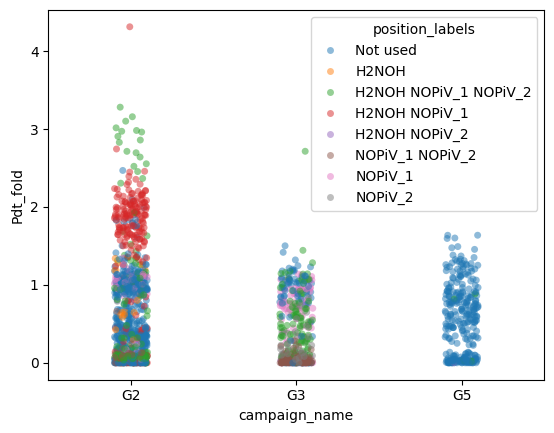

In [82]:
import seaborn as sns

all_df = all_df[all_df['amino-acid_substitutions'] != '-']
hue_order = [ 'Not used', 'H2NOH', 'H2NOH NOPiV_1 NOPiV_2', 'H2NOH NOPiV_1', 'H2NOH NOPiV_2', 'NOPiV_1 NOPiV_2', 'NOPiV_1',  'NOPiV_2', 

]
# Great let's also annotate all mutations that were identified in the final variants or not 
sns.stripplot(all_df, x='campaign_name', y='Pdt_fold', hue='position_labels', hue_order=hue_order, alpha=0.5)

<AxesSubplot:xlabel='campaign_name', ylabel='Pdt_fold'>

/Users/arianemora/miniconda3/envs/etk/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/arianemora/miniconda3/envs/etk/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/arianemora/miniconda3/envs/etk/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/arianemora/miniconda3/envs/etk/lib/python3.11/sit

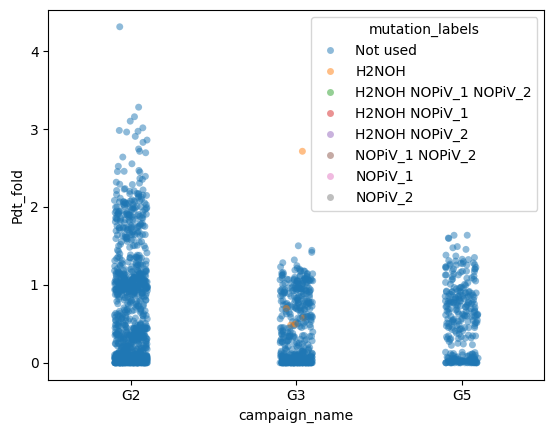

In [85]:
import seaborn as sns

all_df = all_df[all_df['amino-acid_substitutions'] != '-']
hue_order = [ 'Not used', 'H2NOH', 'H2NOH NOPiV_1 NOPiV_2', 'H2NOH NOPiV_1', 'H2NOH NOPiV_2', 'NOPiV_1 NOPiV_2', 'NOPiV_1',  'NOPiV_2', 

]
# Great let's also annotate all mutations that were identified in the final variants or not 
sns.stripplot(all_df, x='campaign_name', y='Pdt_fold', hue='mutation_labels', hue_order=hue_order, alpha=0.5)